# 1 {-}

**This problem introduces the Cholesky decomposition for positive definite matrices in the context of multivariate normals. Let $\Sigma$ be a symmetric, positive definite matrix. Then the Cholesky decomposition is given by $\Sigma = AA^T$ for some lower triangular, invertible matrix $A$. This contrasts with the spectral factorization, $\Sigma = QDQ^T$ . (In (d) you’ll see that computing Cholesky is much faster.)**

# a {-}

**Let $Z$ be a r.v. with dimension $n$, i.e. $Z = (Z_1,Z_2,...,Z_n)$, and mean $0$. Show that the covariance matrix of $Z$ is given by $E[ZZ^T]$ where we think of $Z $as a column vector.**

By definition the covariance matrix is:

$$\begin{pmatrix}
\text{cov}(Z_1,Z_1) & \text{cov}(Z_1,Z_2) & \ldots & \text{cov}(Z_1,Z_n) \\
\text{cov}(Z_2,Z_1) & \text{cov}(Z_2,Z_2) & \ldots & \text{cov}(Z_2,Z_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(Z_n,Z_1) & \text{cov}(Z_n,Z_2) & \ldots & \text{cov}(Z_n,Z_n)
\end{pmatrix}$$

$$=\begin{pmatrix}
E(Z_1Z_1) & E(Z_1Z_2) & \ldots & E(Z_1Z_n) \\
E(Z_2Z_1) & E(Z_2Z_2) & \ldots & E(Z_2Z_n) \\
\vdots & \vdots & \ddots & \vdots \\
E(Z_nZ_1) & E(Z_nZ_2) & \ldots & E(Z_nZ_n)
\end{pmatrix}$$

because the mean of $Z$ is 0

$$=E\begin{pmatrix}
Z_1Z_1 & Z_1Z_2 & \ldots & Z_1Z_n \\
Z_2Z_1 & Z_2Z_2 & \ldots & Z_2Z_n \\
\vdots & \vdots & \ddots & \vdots \\
Z_nZ_1 & Z_nZ_2 & \ldots & Z_nZ_n
\end{pmatrix}$$

because the expected value of a matrix is defined as the matrix of expected values

$$=E[ZZ^T]$$

# b {-}

**Let $X$ be a multivariate normal with mean $0$ and covariance $\Sigma$, i.e. $X \sim N(0,\Sigma)$. Let $\Sigma = AA^T$ be the Cholesky decomposition of $\Sigma$. Show that $Y = A^{-1}X$ satisfies $Y \sim N(0,I)$ where $I$ is the $n \times n$ identity matrix.**

Consider $X \sim N(0,\Sigma)$  and let $\Sigma = AA^T$ be the Cholesky decomposition of $\Sigma$.

Let $Y=A^{-1}X$ then from a previous HW we know $Y$ is a multivariate normal as well with

$$E[Y]=E[A^{-1}X]=A^{-1}E[X]=0$$

and

$$\text{cov}Y$$
$$=E[(Y-0)(Y-0)^T]$$
$$=E[YY^T]$$
$$=E[A^{-1}X(A^{-1}X)^T]$$
$$=E[A^{-1}XX^TA^{-T}]$$
$$=A^{-1}E[XX^T]A^{-T}$$
$$=A^{-1}\Sigma A^{-T}$$
$$=A^{-1}\Sigma A^{-T}$$
$$=A^T A^{-T}$$

since $\Sigma = AA^T \implies A^{-1}\Sigma=A^T$

$$=I$$

by definition of matrix inverse

And thus,

$$Y \sim N(0,I)$$



# c {-}

**Write a function CholeskyMV(sigma) that samples a mutivariate normal with mean $0$ and covariance matrix given by the variable sigma using a Cholesky decomposition. (You may use the R or Python function to compute a Cholesky decomposition and your languages univariate normal sampler). (Be careful because some cholesky functions return $A^T$ and some return $A$. You need to check which one yours returns and write your code accordingly.)**

CholeskyMV(sigma) will be a function that samples from $Y \sim N(0,1)$ and once we have the cholesky decomposition $\Sigma=AA^T$, we do $AY=A(A^{-1}X)=AA^{-1}X=X$ giving us samples from $X$.

In [1]:
from scipy.spatial.distance import cdist
from scipy.linalg import cholesky
import scipy
import numpy as np

In [2]:
def CholeskyMV(sigma):
    """samples a MVN using cholesky and a MVN with diagonal covariance"""
    A = cholesky(sigma, lower=True)
    yhat = np.random.normal(loc=0.0, scale=1.0, size=(len(sigma),1))
    return A.dot(yhat)

# d {-}

**Let $t = (t_1,t_2,...,t_n)$ be a collection of times. Write a function ConstructSigma(t, sigma2, lambda) that returns a $n \times n$ matrix $\Sigma$ with $\Sigma_{ij} = r(|t_i − t_j |)$ where $r(t) = \sigma^2 \exp(−\lambda t)$. Then set $\sigma^2 = 1, \lambda = 1, t = (1,2,3,...,5000)$, construct $\Sigma$, and compare the time needed to compute the Cholesky decomposition (using chol in R and scipy.linalg.cholesky in Python) and the spectral decomposition (using eigen in R and scipy.linalg.eig in Python) of $\Sigma$. (On my machine it took 200 seconds to compute the spectral decomposition and 20 to compute the cholesky.)**

In [3]:
def ConstructSigma(t, sigma2, l):
    """computes the covariance matrix in d"""
    distances = cdist(t.reshape(-1,1) ,t.reshape(-1,1), 'minkowski', p=1.)
    covariance = sigma2*np.exp(-l*distances)
    return covariance

In [4]:
t = np.arange(1, 5001)
sigma2 = 1
l = 1
covariance = ConstructSigma(t, sigma2, l)

In [5]:
import time
start = time.time()
A = cholesky(covariance, lower=True)
end = time.time()
print(f"It takes {end - start} seconds to compute the Cholesky decomposition")

It takes 1.315587043762207 seconds to compute the Cholesky decomposition


In [6]:
start = time.time()
M = scipy.linalg.eig(covariance)
end = time.time()
print(f"It takes {end - start} seconds to compute the Spectral decomposition")

It takes 71.52764296531677 seconds to compute the Spectral decomposition


From above, clearly, the Cholesky decomposition is faster.

# 2 {-}

**Let $X(t)$ be a mean zero, stationary Gaussian processes (GP) with covariance function $r(t) = \sigma^2 exp(−\lambda t)$. (That $X(t)$ is mean zero means that the its distribution at any fixed time has mean zero.)**

# a {-}

**What is the distribution of $X(0)$? What is the distribution $X(\tau)$ for some fixed time $\tau$?**

Since $X(t)$ is a GP it is a (potentially infinite) collection of random variables such that the joint distribution of every finite subset of random variables is normal (multivariate or univariate) too. So it follows that $X(0)$ and $X(\tau)$ are both normal random variables assuming $X(t) \in R$ for each $t$ of the process. We just need to find the respective means and variances:

$E[X(0)]=E[X(t)]=0$ by prompt.

$$\text{var}X(0)=\text{cov}[X(0), X(0)]=r(0)=\sigma^2 \exp(−\lambda 0)=\sigma^2$$

Similarly for given time $\tau$,

$$\text{var}X(\tau)=\text{cov}[X(\tau), X(\tau)]=r(0)=\sigma^2 \exp(−\lambda 0)=\sigma^2$$

So $X(0)\sim N(0,\sigma^2)$ and $X(\tau)\sim N(0,\sigma^2)$.

# b {-}

**For each of the parameter values below, plot a sample of $X(t)$ by sampling values $\hat{X(t)}$ for $t = 0$ to $t = 10$ in increments of $0.01$.**

- $\sigma^2=1$ and $\lambda=10$

- $\sigma^2=1$ and $\lambda=1$

- $\sigma^2=10$ and $\lambda=1$

**Use your Cholesky decomposition function from problem 1.**

i) $\sigma^2=1$ and $\lambda=10$

In [7]:
t = np.arange(0, 10, 0.01)
sigma2 = 1
l = 10
covariance = ConstructSigma(t, sigma2, l)

In [8]:
samples1 = CholeskyMV(covariance)

ii) $\sigma^2=1$ and $\lambda=1$

In [9]:
sigma2 = 1
l = 1
covariance = ConstructSigma(t, sigma2, l)

In [10]:
samples2 = CholeskyMV(covariance)

ii) $\sigma^2=10$ and $\lambda=1$

In [11]:
sigma2 = 10
l = 1
covariance = ConstructSigma(t, sigma2, l)

In [12]:
samples3 = CholeskyMV(covariance)

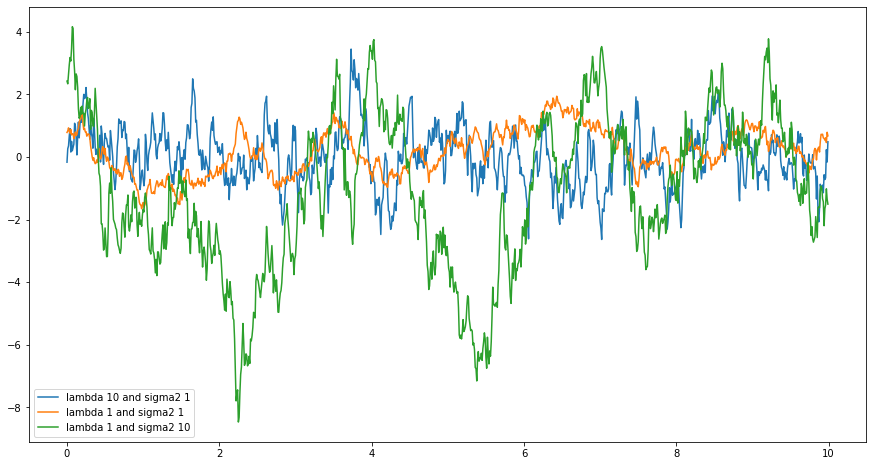

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(t, samples1, label="lambda 10 and sigma2 1")
plt.plot(t, samples2, label="lambda 1 and sigma2 1")
plt.plot(t, samples3, label="lambda 1 and sigma2 10")
plt.legend()
plt.show()

# c {-}

**Compare the sample paths you produced in (b) and explain how they reflect the parameter values.**

As $\lambda$ increases, the autocorrelation function decreases towards zero -- i.e., values $k$ lags apart are less correlated resulting in irregular behavior. This can be seen in the blue (higher $\lambda$) vs. orange lines (lower $\lambda$). As we increase $\sigma^2$, y-values can reach higher absolute values by definition of $r(0)=\sigma^2\exp^{-\lambda0}$. This can be observed in the green (higher $r(0)$) vs. the orange lines (lower $r(0)$).

# 3 {-}

**Attached you will find the file temperatures.csv which I obtained from the Kaggle site (www.kaggle.com). The data was posted by user sumanthvrao under the title Daily climate data in the city of delhi from 2013 to 2017. The temperatures.csv file contains the mean temperature in Delhi, India from March through June in the years 2013-2016. The three columns of the file give the year, day (1 is March 1 and 122 is June 30), and mean temperature respectively. In this problem we will fit the following model,**

$$\text{temperature}(t, y) = a_0 + a_1t + X(t)$$

**where temperature(t, year) is the dataset temperature at day $t$ in year $y, a_0,a_1 \in R$, and $X(t)$ is a mean zero, Gaussian process. (Notice we will assume no error in the temperature measurements). Assume that $X(t)$ has covariance function $r(t) = \sigma^2 \exp(−\lambda t)$. Let $\Sigma$ be the covariance matrix of $X(t)$ for $t = 1,2,...,122$.**

**Our goal is to estimate the parameters $a_0, a_1, \sigma_2, \lambda$. We will show that $a_0, a_1, \sigma_2$ can be estimated analytically, allowing us to estimate $\lambda$ by a one-dimensional optimization.**

In [14]:
import pandas as pd
data = pd.read_csv("Temperatures.csv")

Let's look at our data

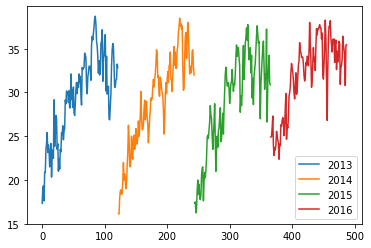

In [15]:
data.groupby("year")["temp"].plot()
plt.legend()
plt.show()

# a {-}

**Let $T^{(y)}$ be the $122$ dimensional vector collecting the temperatures in year $y$ and let $M$ be a $122 \times 2$ matrix with the first column formed by all $1$’s and the second column formed by the numbers $1$ through $122$. Letting $a = (a_0 , a_1 )$, and thinking of $a$ as a column vector, show that $T^{(y)} − M a$ is a $122$ dimensional vector with its $t$th entry given by**

$$\text{temperature}(t, y) -a_0 - a_1t$$

**Then show that the likelihood of the data is given by**

$$L(a_0, a_1, \sigma^2, \lambda)=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi)^{122}\text{det}\Sigma}}\exp [-\frac{(T^{(y)} − M a)^T\Sigma^{-1}(T^{(y)} − M a)}{2}]$$


By definition,

$$T^{(y)} − M a$$

$$=\begin{pmatrix}
\text{temperature}(1, y) \\
\text{temperature}(2, y) \\
\vdots \\
\text{temperature}(122, y)
\end{pmatrix}- \begin{pmatrix}
1 & 1 \\
1 & 2 \\
\vdots & \vdots \\
1 & 122
\end{pmatrix}\begin{pmatrix}
a_0 \\ 
a_1 
\end{pmatrix}$$

$$=\begin{pmatrix}
\text{temperature}(1, y) \\
\text{temperature}(2, y) \\
\vdots \\
\text{temperature}(122, y)
\end{pmatrix}- \begin{pmatrix}
a_0 + 1a_1 \\
a_0 + 2a_1 \\
\vdots \\
a_0 + 122a_1
\end{pmatrix}$$

$$=\begin{pmatrix}
\text{temperature}(1, y) - a_0 - 1a_1 \\
\text{temperature}(2, y) - a_0 - 2a_1 \\
\vdots \\
\text{temperature}(122, y) - a_0 - 122a_1 
\end{pmatrix}$$

So $T^{(y)} − M a$ is a $122$ dimensional vector with its $t$th entry given by $\text{temperature}(t, y) -a_0 - a_1t$.

We have that for each $y$, $X(t)=\text{temperature}(t, y) - a_0 - a_1t$ is a gaussian process. For ease of notation let $g^{(y)}_t$ be $\text{temperature}(t, y) - a_0 - a_1t$ and consequently, $g^{(y)}=T^{(y)} − M a$ be the vector that collects the $122$ $g^{(y)}_t$ terms.

Then $g^{(y)}$ is distributed as a multivariate normal with mean $0$ and covariance $\Sigma$ by prompt. So it follows that:

$$L(a_0, a_1, \sigma^2, \lambda)=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi)^{122}\text{det}\Sigma}}\exp [-\frac{(g^{(y)})^T\Sigma^{-1}g^{(y)}}{2}]$$

$$=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi)^{122}\text{det}\Sigma}}\exp [-\frac{(T^{(y)} − M a)^T\Sigma^{-1}(T^{(y)} − M a)}{2}]$$




# b {-}

**Let $\Gamma$ be the the covariance matrix of $X(t)$ over $t = 1,2,...,122$ with $r(t)$ set to $r(t) = exp(−\lambda t)$. Show that $\Sigma = \sigma^2\Gamma$ and consequently we can rewrite the likelihood as**


$$L(a_0, a_1, \sigma^2, \lambda)=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi\sigma^2)^{122}\text{det}\Gamma}}\exp [-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}]$$

**where $\Gamma$ only depends on $\lambda$.**

Let $i,j$ be given, then:

$$\Sigma_{ij}=r_{\Sigma}(|i-j|)=\sigma^2\exp(-\lambda |i-j|)=\sigma^2r_{\Gamma}(|i-j|)=\sigma^2\Gamma_{ij}$$

$$\implies \Sigma=\sigma^2\Gamma$$



And so,

$$L(a_0, a_1, \sigma^2, \lambda)=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi)^{122}\text{det}\Sigma}}\exp [-\frac{(T^{(y)} − M a)^T\Sigma^{-1}(T^{(y)} − M a)}{2}]$$

$$=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi)^{122}\text{det}(\sigma^2\Gamma)}}\exp [-\frac{(T^{(y)} − M a)^T(\sigma^2\Gamma)^{-1}(T^{(y)} − M a)}{2}]$$

$$=\prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi\sigma^2)^{122}\text{det}\Gamma}}\exp [-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}]$$

The above equality follows because:

1. $\text{det}(\sigma^2\Gamma)=\text{det}(\sigma^2I)\text{det}(\Gamma)=(\sigma^2)^{122}\text{det}(\Gamma)$ as $I \sim 122 \times 122$.

2. $(\sigma^2\Gamma)^{-1}=(\sigma^2I\Gamma)^{-1}=\Gamma^{-1}(\sigma^2I)^{-1}=\Gamma^{-1}(\frac{1}{\sigma^2}I)=\frac{1}{\sigma^2}\Gamma^{-1}I=\frac{1}{\sigma^2}\Gamma^{-1}$



# c {-}

**Consider $\lambda$ as fixed. By taking the gradient of $\log L(a_0, a_1, \sigma^2, \lambda)$, with respect to just $a_0,a_1$, and $\sigma^2$, show that the likelihood is maximized at the following parameter values,**

$$a=\frac{1}{4}\sum_{y=2013}^{2016}(M^T\Gamma^{-1}M)^{-1}M^T\Gamma^{-1}T^{(y)}$$

**and**

$$\sigma^2=\frac{1}{4(122)}\sum_{y=2013}^{2016}(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)}-Ma)$$


The log likelihood is:

$$\log L(a_0, a_1, \sigma^2, \lambda)=\log \prod_{y=2013}^{2016}\frac{1}{\sqrt{(2\pi\sigma^2)^{122}\text{det}\Gamma}}\exp [-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}]$$

$$=\sum_{y=2013}^{2016}-\log\sqrt{(2\pi\sigma^2)^{122}\text{det}\Gamma}-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}$$

$$=\sum_{y=2013}^{2016}-\frac{122}{2}\log 2\pi\sigma^2-\frac{1}{2}\log \text{det}\Gamma-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}$$

$$=-122(2)\log 2\pi\sigma^2-2\log \text{det}\Gamma-\sum_{y=2013}^{2016}\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}$$

First,

$$\frac{\partial \log L(a_0, a_1, \sigma^2, \lambda)}{\partial \sigma^2}$$

$$=-\frac{122(2)}{\sigma^2}+\sum_{y=2013}^{2016}\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2(\sigma^2)^2}=0$$

$$\implies \sum_{y=2013}^{2016}\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{(\sigma^2)^2}=\frac{4(122)}{\sigma^2}$$

$$\implies \frac{1}{4(122)}\sum_{y=2013}^{2016}(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)=\sigma^2$$

Second,

$$\nabla_a \log L(a_0, a_1, \sigma^2, \lambda)$$

$$=-\sum_{y=2013}^{2016}\nabla_a\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}$$

$$=-\sum_{y=2013}^{2016}\nabla_a\frac{(T^{(y)})^T\Gamma^{-1}T^{(y)}-(T^{(y)})^T\Gamma^{-1}Ma-a^TM^T\Gamma^{-1}T^{(y)}+a^TM^T\Gamma^{-1}Ma}{2\sigma^2}$$


$$=-\sum_{y=2013}^{2016}\frac{-2M^T\Gamma^{-1}T^{(y)}+2M^T\Gamma^{-1}Ma}{2\sigma^2}$$

$$=\sum_{y=2013}^{2016}\frac{M^T\Gamma^{-1}T^{(y)}-M^T\Gamma^{-1}Ma}{\sigma^2}=0$$

$$\implies \sum_{y=2013}^{2016}M^T\Gamma^{-1}T^{(y)}=4M^T\Gamma^{-1}Ma$$

$$\implies \frac{1}{4}\sum_{y=2013}^{2016}(M^T\Gamma^{-1}M)^{-1}M^T\Gamma^{-1}T^{(y)}=a$$

Note that $M^T\Gamma^{-1}M$ is invertible because it is a positive definite matrix:

Recall that a matrix $A$ is positive definite if symmetric and $x^TAx > 0$ for any $x \ne 0$.

1. $(M^T\Gamma^{-1}M)^T=M^T(\Gamma^{-1})^TM=M^T\Gamma^{-1}M$ since $(\Gamma^{-1})^T=\Gamma^{-1}$ by making use of the spectral decomposition theorem.

2. Let $x \ne 0$, $x^TM^T\Gamma^{-1}Mx=(Mx)^T\Gamma^{-1}Mx=(Mx)^T(\frac{\Sigma}{\sigma^2})^{-1}Mx=\sigma^2(Mx)^T\Sigma^{-1}Mx>0$. This follows because $\sigma^2>0$ and $\Sigma\implies \Sigma^{-1}$ is positive definite by assumption in prompt (we are dealing with invertible convariance matrices).

# d {-}

**While we can derive explicit formulas for $a_0,a_1,\sigma^2$, we cannot do so with $\lambda$. We could take a steepest ascent approach to fitting the model, but since we can analytically determine all the other parameters given a particular value of $\lambda$, instead we can optimize $\lambda$ numerically. Consider a grid of $\lambda$ values. Over the grid, determine the maximum log likelihood for each $\lambda$ value by using (c) to set the other parameters. Then, determine the optimal $\lambda$ by comparing the maximum likelihoods across the grid points. What is your final estimate for $a_0, a_1, \sigma^2$ and $\lambda$? What do these values tell you?**

$$a=\frac{1}{4}\sum_{y=2013}^{2016}(M^T\Gamma^{-1}M)^{-1}M^T\Gamma^{-1}T^{(y)}$$


$$\sigma^2=\frac{1}{4(122)}\sum_{y=2013}^{2016}(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)}-Ma)$$

$$=\sum_{y=2013}^{2016}-\frac{122}{2}\log 2\pi\sigma^2-\frac{1}{2}\log \text{det}\Gamma-\frac{(T^{(y)} − M a)^T\Gamma^{-1}(T^{(y)} − M a)}{2\sigma^2}$$

In [16]:
def logL(l, t=np.arange(1,123,1), params=False):
    
    def ConstructGamma(t, l):
        distances = cdist(t.reshape(-1,1) ,t.reshape(-1,1), 'minkowski', p=1.)
        gamma = np.exp(-l*distances)
        return gamma

    def get_a(M, gamma_inverse):
        a = 0
        for y in [2013, 2014, 2015, 2016]:
            Ty = data[data["year"] == y]["temp"].to_numpy()
            a += np.linalg.inv(M.T.dot(gamma_inverse).dot(M)).dot(M.T).dot(gamma_inverse).dot(Ty)
        return a/4
    
    def get_sigma2(M, gamma_inverse, a):
        sigma2 = 0
        for y in [2013, 2014, 2015, 2016]:
            Ty = data[data["year"] == y]["temp"].to_numpy()
            sigma2 += (Ty-M.dot(a)).T.dot(gamma_inverse).dot(Ty-M.dot(a))
        return sigma2/(4*122)

    gamma = ConstructGamma(t, l)
    gamma_inverse = np.linalg.inv(gamma)
    M = np.append(np.ones(122).reshape(-1,1), np.arange(1,123).reshape(-1,1), axis=1)
    a = get_a(M, gamma_inverse)
    sigma2 = get_sigma2(M, gamma_inverse, a)
    
    logL = -(122*2)*np.log(2*np.pi*sigma2)-2*np.log(np.linalg.det(gamma))
    for y in [2013, 2014, 2015, 2016]:
        Ty = data[data["year"] == y]["temp"].to_numpy()
        logL -= (Ty-M.dot(a)).T.dot(gamma_inverse).dot(Ty-M.dot(a))/(2*sigma2)
        
    if params:
        return logL, a, sigma2
    return logL

In [17]:
l = np.arange(0.01, 10, 0.01)
logLs = list(map(logL, l))

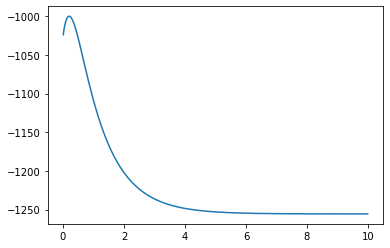

In [18]:
plt.plot(l, logLs)
plt.show()

In [19]:
lambda_star = l[np.argmax(logLs)]
lambda_star

0.2

In [20]:
logL(lambda_star, params=True)

(-1000.1058078458794, array([22.26346816,  0.11824275]), 10.606370463621063)

**What is your final estimate for $a_0, a_1, \sigma^2$ and $\lambda$? What do these values tell you?**

So $a_0=22.26346816, a_1=0.11824275, \sigma^2=10.606370463621063, \lambda=0.2$

In other words we have the following model for a given year $y$,

$$\text{temperature(t, y)} \approx 22.3+0.12t+X(t)$$

with $X(t)$ being a gaussian process with mean $0$ and covariance function $r(s)\approx 10.6\exp^{-0.2s}$

For a given year, $a_0, a_1$ tell us the expected value of $\text{temperature(t,y)}$. We see that $\text{temperature(0,y)}\approx 22.3$, roughly in line with what is seen in the below plot for each year and $\text{temperature(0,122)}\approx 36.9$, roughly in line as well with the below plot for each year. $\sigma^2, \lambda$ determine the covariance matrix, which lets us know the variance of the temperature at fixed $t$ as well as the autocovariance between temperatures $s$ days apart. So for example, $\sqrt{r(0)}\approx 3.25$, meaning that although we expect a temperature of $22.3$ on day $0$ of any given year, this could deviate with a standard deviation of $3.25$. Similarly $r(122)/r(0)\approx 2.5*10^{-11}$, so temperatures 122 days apart, within our timeframe of March through June, are almost uncorrelated. 



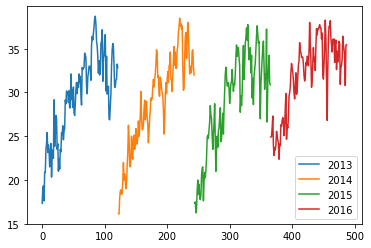

In [21]:
data.groupby("year")["temp"].plot()
plt.legend()
plt.show()